In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import SVMSMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 21s 82us/step - loss: 0.0014 - val_loss: 2.7066e-04
Epoch 2/150
256326/256326 [==============================] - 21s 83us/step - loss: 1.8918e-04 - val_loss: 1.4220e-04
Epoch 3/150
256326/256326 [==============================] - 21s 81us/step - loss: 1.3371e-04 - val_loss: 1.1915e-04
Epoch 4/150
256326/256326 [==============================] - 21s 82us/step - loss: 1.1846e-04 - val_loss: 1.1357e-04
Epoch 5/150
256326/256326 [==============================] - 21s 84us/step - loss: 1.0881e-04 - val_loss: 1.0917e-04
Epoch 6/150
256326/256326 [==============================] - 21s 82us/step - loss: 1.0286e-04 - val_loss: 1.0592e-04
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 20s 78us/step - loss: 3.6706e-05 - val_loss: 3.5715e-05
Epoch 69/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.6657e-05 - val_loss: 4.4386e-05
Epoch 70/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.6589e-05 - val_loss: 3.7247e-05
Epoch 71/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.6325e-05 - val_loss: 3.5302e-05
Epoch 72/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.6477e-05 - val_loss: 3.2624e-05
Epoch 73/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.6235e-05 - val_loss: 3.6363e-05
Epoch 74/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.6288e-05 - val_loss: 4.3724e-05
Epoch 75/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.6237e-05 - val_loss: 3.6487e-05
Epoch 76/150
256326/256326 [==============================] - 20s 78u

256326/256326 [==============================] - 21s 83us/step - loss: 3.3334e-05 - val_loss: 3.3474e-05
Epoch 138/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.3018e-05 - val_loss: 3.1719e-05
Epoch 139/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.2629e-05 - val_loss: 3.3989e-05
Epoch 140/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.2598e-05 - val_loss: 3.9877e-05
Epoch 141/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.3053e-05 - val_loss: 3.0097e-05
Epoch 142/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.2533e-05 - val_loss: 3.8351e-05
Epoch 143/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.2426e-05 - val_loss: 4.1383e-05
Epoch 144/150
256326/256326 [==============================] - 22s 84us/step - loss: 3.1919e-05 - val_loss: 3.3486e-05
Epoch 145/150
256326/256326 [==============================] -

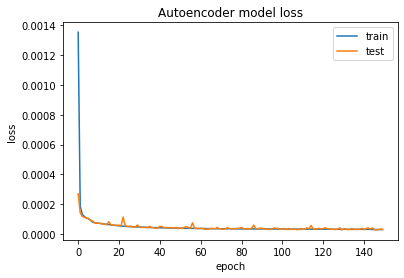

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 52s 202us/step - loss: 0.0209 - accuracy: 0.9947 - val_loss: 0.0038 - val_accuracy: 0.9994
Epoch 2/50
256326/256326 [==============================] - 50s 194us/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 3/50
256326/256326 [==============================] - 50s 193us/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 4/50
256326/256326 [==============================] - 49s 192us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 49s 192us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 6/50
256326/256326 [==============================] - 50s 193us/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 7/50
256326/256326 [=================

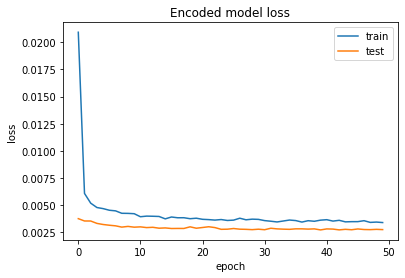

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994733330992591


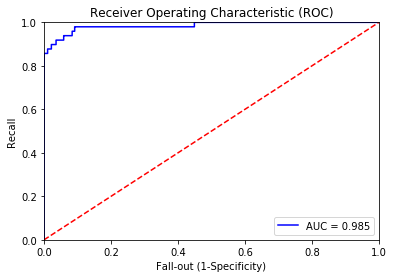

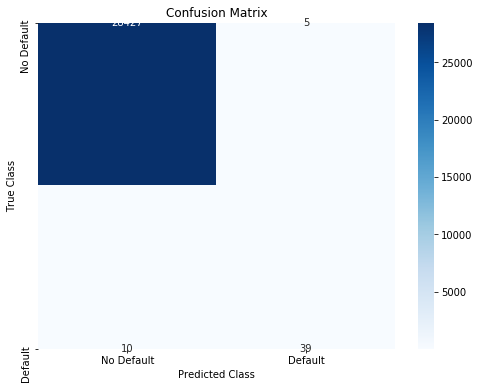

AUC(ROC): 0.8978712545794908
Precision: 0.8863636363636364
Recall: 0.7959183673469388
F1 score: 0.8387096774193548
False positives: 5
True positives: 39
False negatives: 10
True negatives: 28427
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 22s 87us/step - loss: 0.0013 - val_loss: 2.8787e-04
Epoch 2/150
256326/256326 [==============================] - 21s 84us/step - loss: 1.8613e-04 - val_loss: 1.6363e-04
Epoch 3/150
256326/256326 [==============================] - 22s 86us/step - loss: 1.3652e-04 - val_loss: 1.3485e-04
Epoch 4/150
256326/256326 [==============================] - 22s 87us/step - loss: 1.2415e-04 - val_loss: 1.2272e-04
Epoch 5/150
256326/256326 [==============================] - 22s 86us/step - loss: 1.1644e-04 - val_loss: 1.0536e-04
Epoch 6/150
256326/256326 [==============================] - 22s 86us/step - loss: 1.0239e-04 - val_loss: 9.6625e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 22s 87us/step - loss: 3.9477e-05 - val_loss: 4.2423e-05
Epoch 69/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.9186e-05 - val_loss: 4.0856e-05
Epoch 70/150
256326/256326 [==============================] - 23s 88us/step - loss: 3.9222e-05 - val_loss: 3.9305e-05
Epoch 71/150
256326/256326 [==============================] - 23s 88us/step - loss: 3.8830e-05 - val_loss: 3.6583e-05
Epoch 72/150
256326/256326 [==============================] - 22s 87us/step - loss: 3.9058e-05 - val_loss: 5.3845e-05
Epoch 73/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.8580e-05 - val_loss: 3.5072e-05
Epoch 74/150
256326/256326 [==============================] - 22s 88us/step - loss: 3.8417e-05 - val_loss: 4.1801e-05
Epoch 75/150
256326/256326 [==============================] - 23s 90us/step - loss: 3.8521e-05 - val_loss: 3.6460e-05
Epoch 76/150
256326/256326 [==============================] - 23s 90u

256326/256326 [==============================] - 23s 88us/step - loss: 3.2354e-05 - val_loss: 4.6457e-05
Epoch 138/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.2379e-05 - val_loss: 4.1188e-05
Epoch 139/150
256326/256326 [==============================] - 23s 88us/step - loss: 3.2170e-05 - val_loss: 3.1333e-05
Epoch 140/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.2054e-05 - val_loss: 3.2906e-05
Epoch 141/150
256326/256326 [==============================] - 23s 88us/step - loss: 3.1918e-05 - val_loss: 3.2622e-05
Epoch 142/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.2362e-05 - val_loss: 3.2114e-05
Epoch 143/150
256326/256326 [==============================] - 23s 88us/step - loss: 3.1938e-05 - val_loss: 3.1167e-05
Epoch 144/150
256326/256326 [==============================] - 22s 85us/step - loss: 3.2049e-05 - val_loss: 3.2612e-05
Epoch 145/150
256326/256326 [==============================] -

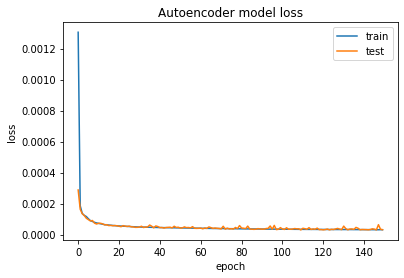

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 51s 200us/step - loss: 0.0375 - accuracy: 0.9892 - val_loss: 0.0055 - val_accuracy: 0.9992
Epoch 2/50
256326/256326 [==============================] - 50s 196us/step - loss: 0.0075 - accuracy: 0.9988 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 3/50
256326/256326 [==============================] - 50s 195us/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 4/50
256326/256326 [==============================] - 50s 196us/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 5/50
256326/256326 [==============================] - 50s 196us/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 6/50
256326/256326 [==============================] - 50s 194us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 7/50
256326/256326 [=================

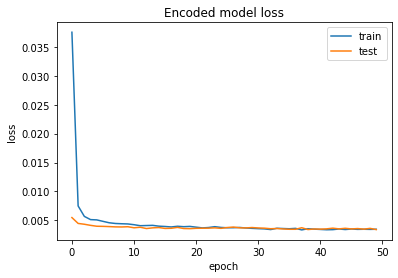

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.999403110845827


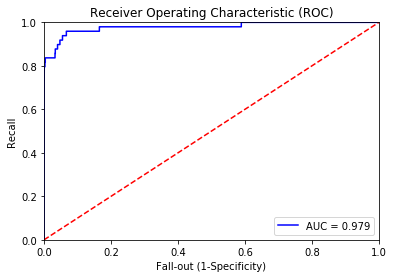

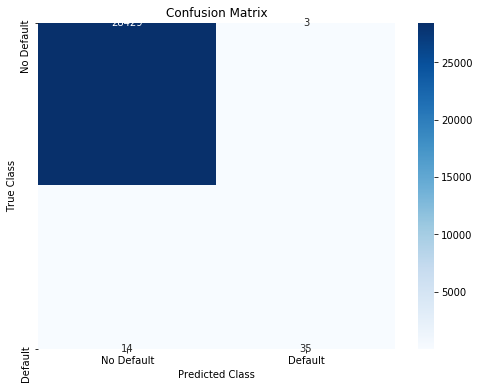

AUC(ROC): 0.8570900996864701
Precision: 0.9210526315789473
Recall: 0.7142857142857143
F1 score: 0.8045977011494253
False positives: 3
True positives: 35
False negatives: 14
True negatives: 28429
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 23s 88us/step - loss: 0.0014 - val_loss: 2.5239e-04
Epoch 2/150
256326/256326 [==============================] - 25s 97us/step - loss: 1.8705e-04 - val_loss: 1.5642e-04
Epoch 3/150
256326/256326 [==============================] - 23s 88us/step - loss: 1.3553e-04 - val_loss: 1.2629e-04
Epoch 4/150
256326/256326 [==============================] - 22s 88us/step - loss: 1.1944e-04 - val_loss: 1.0926e-04
Epoch 5/150
256326/256326 [==============================] - 22s 87us/step - loss: 1.0844e-04 - val_loss: 9.9612e-05
Epoch 6/150
256326/256326 [==============================] - 22s 87us/step - loss: 1.0313e-04 - val_loss: 9.6696e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 23s 90us/step - loss: 3.6668e-05 - val_loss: 3.6574e-05
Epoch 79/150
256326/256326 [==============================] - 25s 97us/step - loss: 3.5979e-05 - val_loss: 3.1536e-05
Epoch 83/150
256326/256326 [==============================] - 24s 92us/step - loss: 3.5677e-05 - val_loss: 4.3316e-05
Epoch 84/150
256326/256326 [==============================] - 24s 93us/step - loss: 3.5329e-05 - val_loss: 3.0862e-05
Epoch 85/150
256326/256326 [==============================] - 24s 93us/step - loss: 3.5592e-05 - val_loss: 3.6984e-05
Epoch 86/150
256326/256326 [==============================] - 24s 92us/step - loss: 3.5049e-05 - val_loss: 5.6166e-05
Epoch 87/150
256326/256326 [==============================] - 24s 93us/step - loss: 3.5066e-05 - val_loss: 3.9844e-05
Epoch 88/150
256326/256326 [==============================] - 23s 91us/step - loss: 3.5041e-05 - val_loss: 3.2439e-05
Epoch 89/150
256326/256326 [==============================] - 24s 93u

256326/256326 [==============================] - 46s 178us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 40/50
256326/256326 [==============================] - 44s 171us/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 41/50
256326/256326 [==============================] - 45s 174us/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 42/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 43/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 44/50
256326/256326 [==============================] - 46s 179us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 45/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0037 - accurac

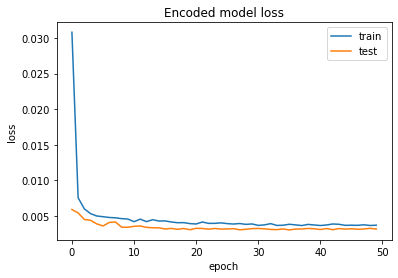

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993328885923949


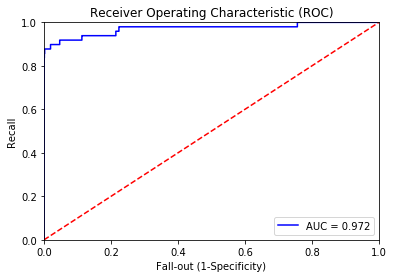

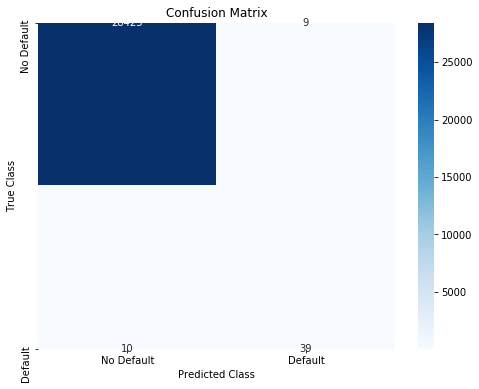

AUC(ROC): 0.8978009113043078
Precision: 0.8125
Recall: 0.7959183673469388
F1 score: 0.8041237113402061
False positives: 9
True positives: 39
False negatives: 10
True negatives: 28423
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511766, 30)
After OverSampling, the shape of train_y: (511766,) 

After OverSampling, counts of label '1': 255883
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.0015 - val_loss: 3.0290e-04
Epoch 2/150
256326/256326 [==============================] - 18s 69us/step - loss: 1.9497e-04 - val_loss: 1.6459e-04
Epoch 3/150
256326/256326 [==============================] - 18s 69us/step - loss: 1.2946e-04 - val_loss: 1.3230e-04
Epoch 4/150
256326/256326 [==============================] - 18s 69us/step - loss: 1.1996e-04 - val_loss: 1.2386e-04
Epoch 5/150
256326/256326 [==============================] - 19s 73us/step - loss: 1.1207e-04 - val_loss: 1.0755e-04
Epoch 6/150
256326/256326 [==============================] - 19s 75us/step - loss: 9.9421e-05 - val_loss: 1.0402e-04
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 18s 70us/step - loss: 3.9431e-05 - val_loss: 4.4098e-05
Epoch 69/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.9406e-05 - val_loss: 4.5848e-05
Epoch 70/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.8987e-05 - val_loss: 4.3156e-05
Epoch 71/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.9178e-05 - val_loss: 4.3311e-05
Epoch 72/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.8891e-05 - val_loss: 4.6008e-05
Epoch 73/150
256326/256326 [==============================] - 19s 73us/step - loss: 3.8793e-05 - val_loss: 4.1127e-05
Epoch 74/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.8728e-05 - val_loss: 5.7395e-05
Epoch 75/150
256326/256326 [==============================] - 18s 70us/step - loss: 3.8833e-05 - val_loss: 3.8813e-05
Epoch 76/150
256326/256326 [==============================] - 18s 70u

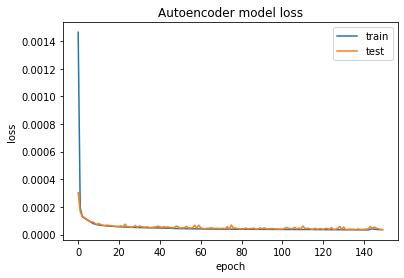

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 54s 209us/step - loss: 0.0233 - accuracy: 0.9943 - val_loss: 0.0057 - val_accuracy: 0.9992
Epoch 2/50
256326/256326 [==============================] - 52s 204us/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0054 - val_accuracy: 0.9993
Epoch 3/50
256326/256326 [==============================] - 52s 203us/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 4/50
256326/256326 [==============================] - 52s 203us/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0051 - val_accuracy: 0.9993
Epoch 5/50
256326/256326 [==============================] - 50s 196us/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 6/50
256326/256326 [==============================] - 51s 200us/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 7/50
256326/256326 [=================

256326/256326 [==============================] - 22s 88us/step - loss: 3.2575e-05 - val_loss: 3.5939e-05
Epoch 128/150
256326/256326 [==============================] - 22s 87us/step - loss: 3.3190e-05 - val_loss: 3.6842e-05
Epoch 129/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.2014e-05 - val_loss: 3.1049e-05
Epoch 130/150
256326/256326 [==============================] - 22s 85us/step - loss: 3.2711e-05 - val_loss: 3.1534e-05
Epoch 131/150
256326/256326 [==============================] - 22s 84us/step - loss: 3.2755e-05 - val_loss: 3.1110e-05
Epoch 132/150
256326/256326 [==============================] - 22s 84us/step - loss: 3.1939e-05 - val_loss: 3.5054e-05
Epoch 133/150
256326/256326 [==============================] - 22s 85us/step - loss: 3.2458e-05 - val_loss: 3.2766e-05
Epoch 134/150
256326/256326 [==============================] - 23s 88us/step - loss: 3.2397e-05 - val_loss: 3.1818e-05
Epoch 135/150
256326/256326 [==============================] -

256326/256326 [==============================] - 22s 86us/step - loss: 3.5340e-05 - val_loss: 3.5866e-05
Epoch 98/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.6198e-05 - val_loss: 5.0185e-05
Epoch 99/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.5659e-05 - val_loss: 5.0688e-05
Epoch 100/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.5050e-05 - val_loss: 3.5301e-05
Epoch 101/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.4718e-05 - val_loss: 3.2017e-05
Epoch 102/150
256326/256326 [==============================] - 22s 85us/step - loss: 3.4591e-05 - val_loss: 3.9513e-05
Epoch 103/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.4475e-05 - val_loss: 3.4935e-05
Epoch 104/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.4474e-05 - val_loss: 3.3347e-05
Epoch 105/150
256326/256326 [==============================] - 2

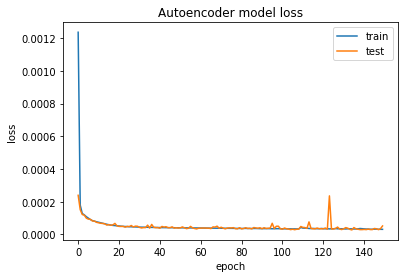

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 51s 197us/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 51s 197us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 12/50
256326/256326 [==============================] - 53s 207us/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 20/50
256326/256326 [==============================] - 53s 208us/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 23/50
256326/256326 [==============================] - 51s 198us/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 26/50
256326/256326 [==============================] - 51s 199us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 33/50
256326/256326 [============

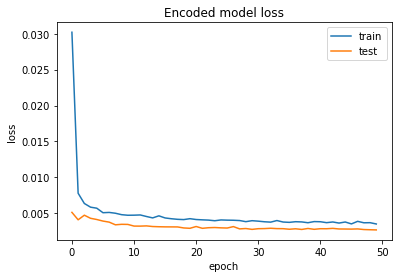

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9995084442259752


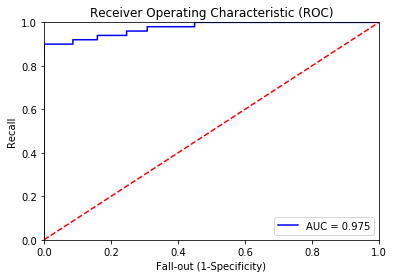

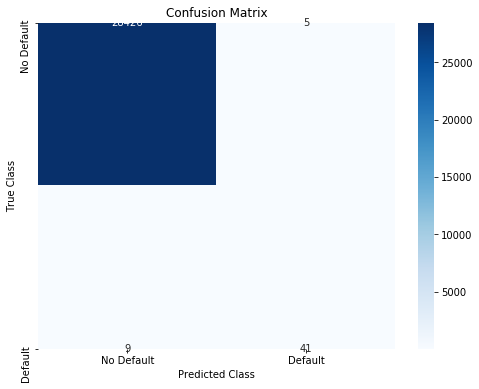

AUC(ROC): 0.9099120678133022
Precision: 0.8913043478260869
Recall: 0.82
F1 score: 0.8541666666666666
False positives: 5
True positives: 41
False negatives: 9
True negatives: 28426
Fold #7
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 25s 96us/step - loss: 0.0014 - val_loss: 2.6158e-04
Epoch 2/150
256326/256326 [==============================] - 24s 95us/step - loss: 2.0034e-04 - val_loss: 1.4701e-04
Epoch 3/150
256326/256326 [==============================] - 24s 93us/step - loss: 1.3213e-04 - val_loss: 1.2409e-04
Epoch 4/150
256326/256326 [==============================] - 24s 95us/step - loss: 1.2047e-04 - val_loss: 1.2004e-04
Epoch 5/150
256326/256326 [==============================] - 24s 93us/step - loss: 1.1310e-04 - val_loss: 1.2032e-04
Epoch 6/150
256326/256326 [==============================] - 24s 95us/step - loss: 1.0229e-04 - val_loss: 9.8044e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 24s 95us/step - loss: 3.4826e-05 - val_loss: 3.8595e-05
Epoch 116/150
256326/256326 [==============================] - 24s 94us/step - loss: 3.3505e-05 - val_loss: 3.5766e-05
Epoch 141/150
256326/256326 [==============================] - 28s 108us/step - loss: 3.3202e-05 - val_loss: 4.8054e-05
Epoch 142/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.3502e-05 - val_loss: 3.9723e-05
Epoch 143/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.3178e-05 - val_loss: 3.4217e-05
Epoch 144/150
256326/256326 [==============================] - 23s 90us/step - loss: 3.3456e-05 - val_loss: 3.4130e-05
Epoch 145/150
256326/256326 [==============================] - 23s 88us/step - loss: 3.3278e-05 - val_loss: 3.7872e-05
Epoch 146/150
256326/256326 [==============================] - 23s 88us/step - loss: 3.3068e-05 - val_loss: 4.7803e-05
Epoch 147/150
256326/256326 [==============================] 

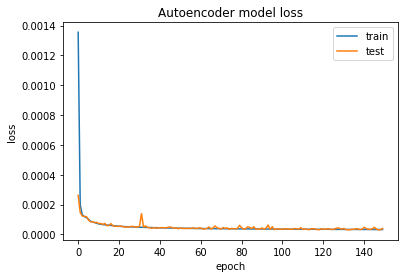

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 56s 217us/step - loss: 0.0266 - accuracy: 0.9938 - val_loss: 0.0075 - val_accuracy: 0.9993
Epoch 2/50
256326/256326 [==============================] - 53s 208us/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.0065 - val_accuracy: 0.9993
Epoch 3/50
256326/256326 [==============================] - 54s 209us/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0056 - val_accuracy: 0.9993
Epoch 4/50
256326/256326 [==============================] - 53s 208us/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0058 - val_accuracy: 0.9993
Epoch 5/50
256326/256326 [==============================] - 54s 209us/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 6/50
256326/256326 [==============================] - 53s 208us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0055 - val_accuracy: 0.9992
Epoch 7/50
256326/256326 [=================

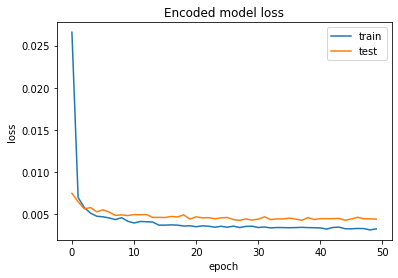

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992275552122467


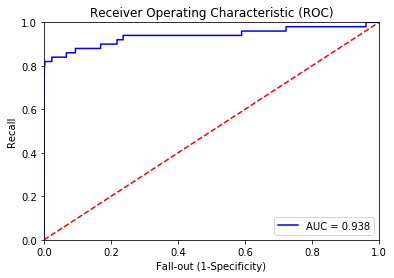

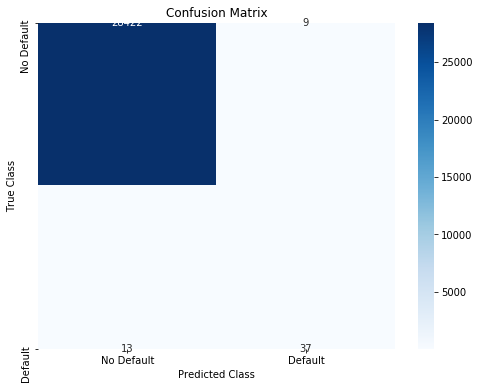

AUC(ROC): 0.8698417220639443
Precision: 0.8043478260869565
Recall: 0.74
F1 score: 0.7708333333333333
False positives: 9
True positives: 37
False negatives: 13
True negatives: 28422
Fold #8
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (511768, 30)
After OverSampling, the shape of train_y: (511768,) 

After OverSampling, counts of label '1': 255884
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 22s 86us/step - loss: 0.0013 - val_loss: 2.5477e-04
Epoch 2/150
256327/256327 [==============================] - 22s 85us/step - loss: 1.8877e-04 - val_loss: 1.4022e-04
Epoch 3/150
256327/256327 [==============================] - 22s 85us/step - loss: 1.3291e-04 - val_loss: 1.3517e-04
Epoch 4/150
256327/256327 [==============================] - 22s 85us/step - loss: 1.2194e-04 - val_loss: 1.2270e-04
Epoch 5/150
256327/256327 [==============================] - 21s 81us/step - loss: 1.1247e-04 - val_loss: 1.0780e-04
Epoch 6/150
256327/256327 [==============================] - 20s 80us/step - loss: 1.0586e-04 - val_loss: 1.1229e-04
Epoch 7/150
256327/256327 [===================

256327/256327 [==============================] - 21s 82us/step - loss: 3.7189e-05 - val_loss: 4.4786e-05
Epoch 69/150
256327/256327 [==============================] - 21s 81us/step - loss: 3.6726e-05 - val_loss: 3.8904e-05
Epoch 70/150
256327/256327 [==============================] - 21s 81us/step - loss: 3.6586e-05 - val_loss: 3.8241e-05
Epoch 71/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.6460e-05 - val_loss: 4.5383e-05
Epoch 72/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.6225e-05 - val_loss: 3.2919e-05
Epoch 73/150
256327/256327 [==============================] - 21s 83us/step - loss: 3.6058e-05 - val_loss: 3.6767e-05
Epoch 74/150
256327/256327 [==============================] - 21s 83us/step - loss: 3.6037e-05 - val_loss: 3.5341e-05
Epoch 75/150
256327/256327 [==============================] - 21s 82us/step - loss: 3.5809e-05 - val_loss: 3.5931e-05
Epoch 76/150
256327/256327 [==============================] - 20s 79u

256327/256327 [==============================] - 21s 82us/step - loss: 3.0566e-05 - val_loss: 3.1034e-05
Epoch 138/150
256327/256327 [==============================] - 21s 83us/step - loss: 3.0087e-05 - val_loss: 2.6486e-05
Epoch 139/150
256327/256327 [==============================] - 21s 81us/step - loss: 3.0298e-05 - val_loss: 3.0147e-05
Epoch 140/150
256327/256327 [==============================] - 21s 81us/step - loss: 2.9986e-05 - val_loss: 2.8236e-05
Epoch 141/150
256327/256327 [==============================] - 20s 78us/step - loss: 2.9947e-05 - val_loss: 3.0040e-05
Epoch 142/150
256327/256327 [==============================] - 21s 81us/step - loss: 3.0058e-05 - val_loss: 5.0265e-05
Epoch 143/150
256327/256327 [==============================] - 23s 91us/step - loss: 3.0097e-05 - val_loss: 2.8898e-05
Epoch 144/150
256327/256327 [==============================] - 22s 87us/step - loss: 2.9876e-05 - val_loss: 3.0347e-05
Epoch 145/150
256327/256327 [==============================] -

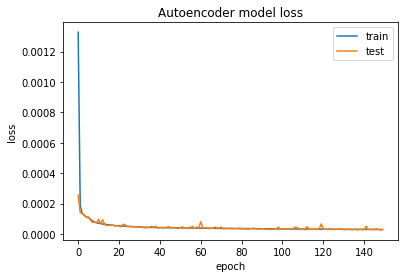

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 55s 215us/step - loss: 0.0223 - accuracy: 0.9957 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 2/50
256327/256327 [==============================] - 54s 209us/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9994
Epoch 3/50
256327/256327 [==============================] - 54s 211us/step - loss: 0.0061 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 4/50
256327/256327 [==============================] - 53s 208us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 5/50
256327/256327 [==============================] - 52s 204us/step - loss: 0.0046 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 11/50
256327/256327 [==============================] - 51s 200us/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 16/50
256327/256327 [===============

256327/256327 [==============================] - 51s 198us/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 29/50
256327/256327 [==============================] - 50s 197us/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 30/50
256327/256327 [==============================] - 51s 197us/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 31/50
256327/256327 [==============================] - 51s 198us/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 41/50
256327/256327 [==============================] - 24s 92us/step - loss: 1.5044e-04 - val_loss: 1.2256e-04
Epoch 4/150
256327/256327 [==============================] - 25s 99us/step - loss: 1.2229e-04 - val_loss: 1.1823e-04
Epoch 5/150
256327/256327 [==============================] - 24s 92us/step - loss: 1.0882e-04 - val_loss: 1.0539e-04
Epoch 6/150
256327/256327 [==========================

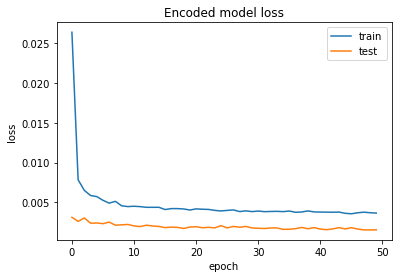

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9995786516853933


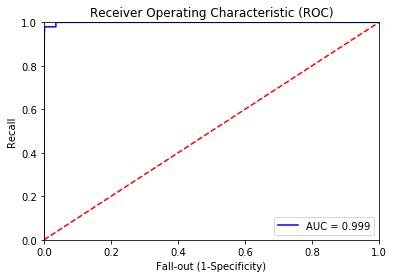

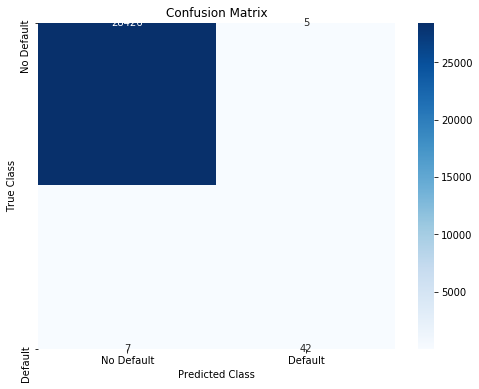

AUC(ROC): 0.9284834963847309
Precision: 0.8936170212765957
Recall: 0.8571428571428571
F1 score: 0.875
False positives: 5
True positives: 42
False negatives: 7
True negatives: 28426


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(10, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SVMSMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 28425.9
 Average fp = 5.6
 Average fn = 10.7
 Average tp = 38.5
 Average Precision = 0.873015873015873
 Average Recall = 0.782520325203252
 Average F1 score = 0.8252947481243301


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284259
 Total fp: 56
 Total fn: 107
 Total tp: 385
 Total Precision = 0.873015873015873
 Total Recall = 0.782520325203252
 Total F1_score = 0.8252947481243301


In [ ]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

In [ ]:
Total_time_hours = Total_time/3600

print(Total_time_hours)